# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = './traffic-signs-data/train.p'
validation_file='./traffic-signs-data/valid.p'
testing_file = './traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np
# TODO: Number of training examples
n_train = y_train.shape[0]

# TODO: Number of validation examples
n_validation = y_valid.shape[0]

# TODO: Number of testing examples.
n_test = y_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline


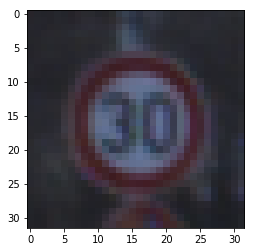

In [4]:
plt.imshow(X_train[3999])

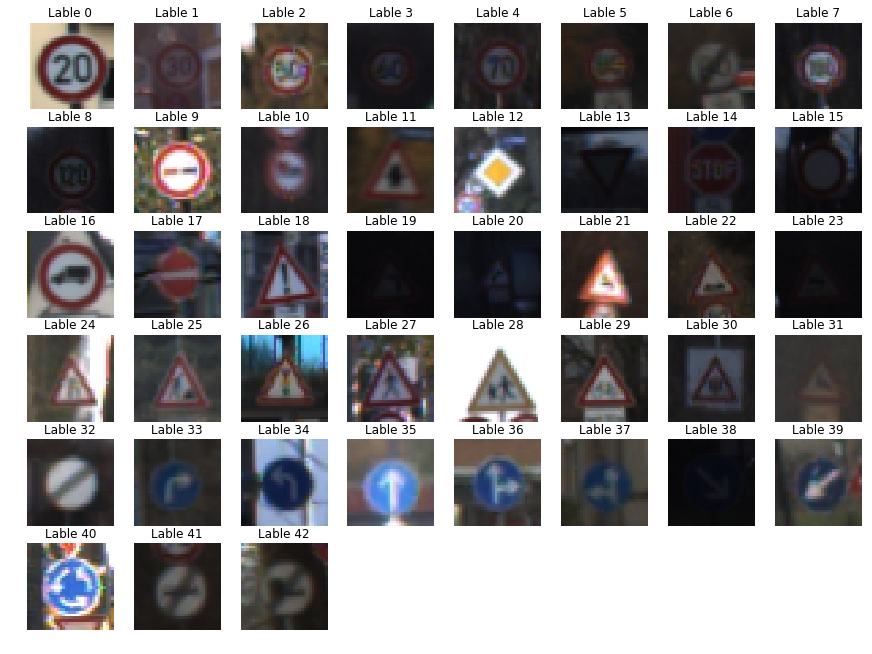

In [5]:
def display_image_and_labels(images, labels):
    unique_labels = np.unique(labels)
    plt.figure(figsize = (15, 15))
    i = 1
    for label in unique_labels:
        image = images[labels == label]
        plt.subplot(8, 8, i)
        plt.axis('off')
        plt.title('Lable {0}'.format(label))
        i += 1
        _ = plt.imshow(image[0])
    plt.show()
    
display_image_and_labels(X_train, y_train)

In [6]:
def label_distribution(images, labels):
    unique_labels = np.unique(labels)
    count = []
    for label in unique_labels:
        image = images[labels == label]
        count.append(len(image))
        

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [7]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
#print(X_train[0][0])
#There are images too dark, appplying the equalize hist function to the images
import cv2

def preprocess(x):
    images = []
    for i in range(x.shape[0]):
        #plt.imshow(x[i])
        img = x[i]
        ycrcb = cv2.cvtColor(img,cv2.COLOR_RGB2YCR_CB)
        channels = cv2.split(ycrcb)
        #print(img.shape)
        cv2.equalizeHist(channels[0], channels[0])
        cv2.merge(channels, ycrcb)
        cv2.cvtColor(ycrcb, cv2.COLOR_YCR_CB2RGB, img)
        #img = img[:, np.newaxis]
        #print(img.shape)
        #plt.imshow(img)
        images.append(img)
        #print(i)
    images = np.array(images)
    images = np.int32(images)
    iamges = (images - 128) / 128
    #print(images.shape)
    return images
X_train_n = preprocess(X_train)
X_valid_n = preprocess(X_valid)
X_test_n = preprocess(X_test)
#display_image_and_labels(X_train_n, y_train)
#X_train_n = np.int32(X_train_p)
#X_valid_n = np.int32(X_valid_p)
#X_test_n = np.int32(X_test_p)

#X_train_n = (X_train_n - 128) / 128
#print(X_train_n[0][0])
#X_valid_n = (X_valid_n - 128) / 128
#X_test_n = (X_test_n - 128) / 128


### Model Architecture

In [8]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.contrib.layers import flatten

def LiuNet(x):
    #Layer0
    '''  
    conv0_w = tf.Variable(tf.truncated_normal(shape = (1, 1, 3, 1), mean = 0, stddev = 0.1))
    conv0_b = tf.Variable(tf.zeros(1))
    conv0 = tf.nn.conv2d(x, conv0_w, strides = [1, 1, 1, 1], padding = 'VALID') + conv0_b
    conv0 = tf.nn.relu(conv0)
    '''
    #Layer1, input = (32, 32, 3), output = (15, 15, 43)
    conv1_w = tf.Variable(tf.truncated_normal(shape = (3, 3, 3, 43), mean = 0, stddev = 0.1))
    conv1_b = tf.Variable(tf.zeros(43))
    conv1 = tf.nn.conv2d(x, conv1_w, strides = [1, 1, 1, 1], padding = 'VALID') + conv1_b
    conv1 = tf.nn.relu(conv1)
    conv1 = tf.nn.max_pool(conv1, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'VALID')
    #Layer2, input = (15, 15, 43), output = (6, 6, 86)
    conv2_w = tf.Variable(tf.truncated_normal(shape = (3, 3, 43, 86), mean = 0, stddev = 0.1))
    conv2_b = tf.Variable(tf.zeros(86))
    conv2 = tf.nn.conv2d(conv1, conv2_w, strides = [1, 1, 1, 1], padding = 'VALID') + conv2_b
    conv2 = tf.nn.relu(conv2)
    conv2 = tf.nn.max_pool(conv2, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'VALID')
    
    
    #Layer3, input = (6, 6, 86), output = (2, 2, 192)
    conv3_w = tf.Variable(tf.truncated_normal(shape = (3, 3, 86, 192), mean = 0, stddev = 0.1))
    conv3_b = tf.Variable(tf.zeros(192))
    conv3 = tf.nn.conv2d(conv2, conv3_w, strides = [1, 1, 1, 1], padding = 'VALID') + conv3_b
    conv3 = tf.nn.relu(conv3)
    conv3 = tf.nn.max_pool(conv3, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'VALID')
    conv3 = tf.nn.dropout(conv3, keep_prob = 0.6)
    
    
    
    
    #Flatten
    fc0 = flatten(conv3)
    
    #Layer4
    fc1_w = tf.Variable(tf.truncated_normal(shape = (768, 384), mean = 0, stddev = 0.1))
    fc1_b = tf.Variable(tf.zeros(384))
    fc1 = tf.matmul(fc0, fc1_w) + fc1_b
    fc1 = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, keep_prob = 0.5)
    
    #Layer5
    fc2_w = tf.Variable(tf.truncated_normal(shape = (384, 192), mean = 0, stddev = 0.1))
    fc2_b = tf.Variable(tf.zeros(192))
    fc2 = tf.matmul(fc1, fc2_w) + fc2_b
    fc2 = tf.nn.relu(fc2)
    
    #Layer6
    
    fc3_w = tf.Variable(tf.truncated_normal(shape = (192, 43), mean = 0, stddev = 0.1))
    fc3_b = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_w) + fc3_b
    
    return logits
    


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [9]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

In [10]:
# training pipeline
rate = 0.001

logits = LiuNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels = one_hot_y, logits = logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [11]:
# evaluation pipeline

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict = {x:batch_x, y:batch_y})
        total_accuracy += (accuracy*len(batch_x))
    return total_accuracy / num_examples

In [12]:
# train the model

from sklearn.utils import shuffle
import time

EPOCHS = 2000
BATCH_SIZE = 3000
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_n)
    
    print('Training...')
    print()
    for i in range(EPOCHS):
        start = time.clock()
        X_train_n, y_train = shuffle(X_train_n, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_n[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x:batch_x, y:batch_y})
        training_time = time.clock() - start
        train_accuracy = evaluate(X_train_n, y_train)
        validation_accuracy = evaluate(X_valid_n, y_valid)
        total_time = time.clock() - start
        print('EPOCH {} ...'.format(i+1))
        print('Total time: {:.0f}|Training time: {:.0f}'.format(total_time, training_time))
        print('Training Accuracy = {:.3f}'.format(train_accuracy))
        print('Validation Accuracy = {:.3f}'.format(validation_accuracy))
        print()
    test_accuracy = evaluate(X_test_n, y_test)
    print('Test Accuracy = {:.3f}'.format(test_accuracy))
            
    saver.save(sess, './LiuNet')
    print('Model saved')

Training...

EPOCH 1 ...
Total time: 4|Training time: 3
Training Accuracy = 0.042
Validation Accuracy = 0.040

EPOCH 2 ...
Total time: 1|Training time: 1
Training Accuracy = 0.041
Validation Accuracy = 0.033

EPOCH 3 ...
Total time: 1|Training time: 1
Training Accuracy = 0.016
Validation Accuracy = 0.015

EPOCH 4 ...
Total time: 1|Training time: 1
Training Accuracy = 0.051
Validation Accuracy = 0.042

EPOCH 5 ...
Total time: 1|Training time: 1
Training Accuracy = 0.057
Validation Accuracy = 0.053

EPOCH 6 ...
Total time: 1|Training time: 1
Training Accuracy = 0.057
Validation Accuracy = 0.055

EPOCH 7 ...
Total time: 1|Training time: 1
Training Accuracy = 0.057
Validation Accuracy = 0.055

EPOCH 8 ...
Total time: 1|Training time: 1
Training Accuracy = 0.058
Validation Accuracy = 0.057

EPOCH 9 ...
Total time: 1|Training time: 1
Training Accuracy = 0.059
Validation Accuracy = 0.058

EPOCH 10 ...
Total time: 1|Training time: 1
Training Accuracy = 0.063
Validation Accuracy = 0.057

EPOCH 

EPOCH 84 ...
Total time: 1|Training time: 1
Training Accuracy = 0.359
Validation Accuracy = 0.326

EPOCH 85 ...
Total time: 1|Training time: 1
Training Accuracy = 0.363
Validation Accuracy = 0.339

EPOCH 86 ...
Total time: 1|Training time: 1
Training Accuracy = 0.366
Validation Accuracy = 0.342

EPOCH 87 ...
Total time: 1|Training time: 1
Training Accuracy = 0.369
Validation Accuracy = 0.348

EPOCH 88 ...
Total time: 1|Training time: 1
Training Accuracy = 0.371
Validation Accuracy = 0.349

EPOCH 89 ...
Total time: 1|Training time: 1
Training Accuracy = 0.371
Validation Accuracy = 0.332

EPOCH 90 ...
Total time: 1|Training time: 1
Training Accuracy = 0.377
Validation Accuracy = 0.344

EPOCH 91 ...
Total time: 1|Training time: 1
Training Accuracy = 0.380
Validation Accuracy = 0.349

EPOCH 92 ...
Total time: 1|Training time: 1
Training Accuracy = 0.387
Validation Accuracy = 0.355

EPOCH 93 ...
Total time: 1|Training time: 1
Training Accuracy = 0.383
Validation Accuracy = 0.358

EPOCH 94 .

EPOCH 167 ...
Total time: 1|Training time: 1
Training Accuracy = 0.597
Validation Accuracy = 0.549

EPOCH 168 ...
Total time: 1|Training time: 1
Training Accuracy = 0.603
Validation Accuracy = 0.548

EPOCH 169 ...
Total time: 1|Training time: 1
Training Accuracy = 0.601
Validation Accuracy = 0.555

EPOCH 170 ...
Total time: 1|Training time: 1
Training Accuracy = 0.604
Validation Accuracy = 0.562

EPOCH 171 ...
Total time: 1|Training time: 1
Training Accuracy = 0.600
Validation Accuracy = 0.554

EPOCH 172 ...
Total time: 1|Training time: 1
Training Accuracy = 0.609
Validation Accuracy = 0.555

EPOCH 173 ...
Total time: 1|Training time: 1
Training Accuracy = 0.610
Validation Accuracy = 0.555

EPOCH 174 ...
Total time: 1|Training time: 1
Training Accuracy = 0.612
Validation Accuracy = 0.555

EPOCH 175 ...
Total time: 1|Training time: 1
Training Accuracy = 0.611
Validation Accuracy = 0.562

EPOCH 176 ...
Total time: 1|Training time: 1
Training Accuracy = 0.606
Validation Accuracy = 0.559



EPOCH 249 ...
Total time: 1|Training time: 1
Training Accuracy = 0.732
Validation Accuracy = 0.673

EPOCH 250 ...
Total time: 1|Training time: 1
Training Accuracy = 0.730
Validation Accuracy = 0.678

EPOCH 251 ...
Total time: 1|Training time: 1
Training Accuracy = 0.734
Validation Accuracy = 0.674

EPOCH 252 ...
Total time: 1|Training time: 1
Training Accuracy = 0.729
Validation Accuracy = 0.678

EPOCH 253 ...
Total time: 1|Training time: 1
Training Accuracy = 0.741
Validation Accuracy = 0.685

EPOCH 254 ...
Total time: 1|Training time: 1
Training Accuracy = 0.740
Validation Accuracy = 0.685

EPOCH 255 ...
Total time: 1|Training time: 1
Training Accuracy = 0.738
Validation Accuracy = 0.680

EPOCH 256 ...
Total time: 1|Training time: 1
Training Accuracy = 0.745
Validation Accuracy = 0.688

EPOCH 257 ...
Total time: 1|Training time: 1
Training Accuracy = 0.744
Validation Accuracy = 0.691

EPOCH 258 ...
Total time: 1|Training time: 1
Training Accuracy = 0.747
Validation Accuracy = 0.680



EPOCH 331 ...
Total time: 1|Training time: 1
Training Accuracy = 0.840
Validation Accuracy = 0.770

EPOCH 332 ...
Total time: 1|Training time: 1
Training Accuracy = 0.841
Validation Accuracy = 0.768

EPOCH 333 ...
Total time: 1|Training time: 1
Training Accuracy = 0.843
Validation Accuracy = 0.775

EPOCH 334 ...
Total time: 1|Training time: 1
Training Accuracy = 0.838
Validation Accuracy = 0.779

EPOCH 335 ...
Total time: 1|Training time: 1
Training Accuracy = 0.845
Validation Accuracy = 0.781

EPOCH 336 ...
Total time: 1|Training time: 1
Training Accuracy = 0.849
Validation Accuracy = 0.772

EPOCH 337 ...
Total time: 1|Training time: 1
Training Accuracy = 0.844
Validation Accuracy = 0.774

EPOCH 338 ...
Total time: 1|Training time: 1
Training Accuracy = 0.850
Validation Accuracy = 0.779

EPOCH 339 ...
Total time: 1|Training time: 1
Training Accuracy = 0.848
Validation Accuracy = 0.780

EPOCH 340 ...
Total time: 2|Training time: 1
Training Accuracy = 0.851
Validation Accuracy = 0.775



EPOCH 413 ...
Total time: 1|Training time: 1
Training Accuracy = 0.905
Validation Accuracy = 0.830

EPOCH 414 ...
Total time: 1|Training time: 1
Training Accuracy = 0.904
Validation Accuracy = 0.826

EPOCH 415 ...
Total time: 1|Training time: 1
Training Accuracy = 0.906
Validation Accuracy = 0.835

EPOCH 416 ...
Total time: 1|Training time: 1
Training Accuracy = 0.909
Validation Accuracy = 0.831

EPOCH 417 ...
Total time: 1|Training time: 1
Training Accuracy = 0.904
Validation Accuracy = 0.830

EPOCH 418 ...
Total time: 1|Training time: 1
Training Accuracy = 0.907
Validation Accuracy = 0.838

EPOCH 419 ...
Total time: 1|Training time: 1
Training Accuracy = 0.907
Validation Accuracy = 0.834

EPOCH 420 ...
Total time: 1|Training time: 1
Training Accuracy = 0.909
Validation Accuracy = 0.830

EPOCH 421 ...
Total time: 1|Training time: 1
Training Accuracy = 0.909
Validation Accuracy = 0.837

EPOCH 422 ...
Total time: 1|Training time: 1
Training Accuracy = 0.911
Validation Accuracy = 0.827



EPOCH 495 ...
Total time: 2|Training time: 1
Training Accuracy = 0.947
Validation Accuracy = 0.876

EPOCH 496 ...
Total time: 1|Training time: 1
Training Accuracy = 0.946
Validation Accuracy = 0.876

EPOCH 497 ...
Total time: 1|Training time: 1
Training Accuracy = 0.948
Validation Accuracy = 0.869

EPOCH 498 ...
Total time: 1|Training time: 1
Training Accuracy = 0.946
Validation Accuracy = 0.875

EPOCH 499 ...
Total time: 1|Training time: 1
Training Accuracy = 0.944
Validation Accuracy = 0.872

EPOCH 500 ...
Total time: 1|Training time: 1
Training Accuracy = 0.948
Validation Accuracy = 0.881

EPOCH 501 ...
Total time: 1|Training time: 1
Training Accuracy = 0.949
Validation Accuracy = 0.877

EPOCH 502 ...
Total time: 1|Training time: 1
Training Accuracy = 0.944
Validation Accuracy = 0.871

EPOCH 503 ...
Total time: 1|Training time: 1
Training Accuracy = 0.948
Validation Accuracy = 0.880

EPOCH 504 ...
Total time: 1|Training time: 1
Training Accuracy = 0.949
Validation Accuracy = 0.884



EPOCH 577 ...
Total time: 1|Training time: 1
Training Accuracy = 0.966
Validation Accuracy = 0.895

EPOCH 578 ...
Total time: 1|Training time: 1
Training Accuracy = 0.965
Validation Accuracy = 0.889

EPOCH 579 ...
Total time: 1|Training time: 1
Training Accuracy = 0.963
Validation Accuracy = 0.897

EPOCH 580 ...
Total time: 1|Training time: 1
Training Accuracy = 0.962
Validation Accuracy = 0.891

EPOCH 581 ...
Total time: 1|Training time: 1
Training Accuracy = 0.965
Validation Accuracy = 0.898

EPOCH 582 ...
Total time: 1|Training time: 1
Training Accuracy = 0.966
Validation Accuracy = 0.896

EPOCH 583 ...
Total time: 1|Training time: 1
Training Accuracy = 0.965
Validation Accuracy = 0.901

EPOCH 584 ...
Total time: 1|Training time: 1
Training Accuracy = 0.967
Validation Accuracy = 0.899

EPOCH 585 ...
Total time: 1|Training time: 1
Training Accuracy = 0.968
Validation Accuracy = 0.898

EPOCH 586 ...
Total time: 1|Training time: 1
Training Accuracy = 0.968
Validation Accuracy = 0.896



EPOCH 659 ...
Total time: 1|Training time: 1
Training Accuracy = 0.976
Validation Accuracy = 0.908

EPOCH 660 ...
Total time: 1|Training time: 1
Training Accuracy = 0.976
Validation Accuracy = 0.909

EPOCH 661 ...
Total time: 1|Training time: 1
Training Accuracy = 0.977
Validation Accuracy = 0.910

EPOCH 662 ...
Total time: 1|Training time: 1
Training Accuracy = 0.975
Validation Accuracy = 0.908

EPOCH 663 ...
Total time: 1|Training time: 1
Training Accuracy = 0.971
Validation Accuracy = 0.903

EPOCH 664 ...
Total time: 1|Training time: 1
Training Accuracy = 0.977
Validation Accuracy = 0.913

EPOCH 665 ...
Total time: 1|Training time: 1
Training Accuracy = 0.977
Validation Accuracy = 0.910

EPOCH 666 ...
Total time: 1|Training time: 1
Training Accuracy = 0.976
Validation Accuracy = 0.916

EPOCH 667 ...
Total time: 1|Training time: 1
Training Accuracy = 0.979
Validation Accuracy = 0.911

EPOCH 668 ...
Total time: 1|Training time: 1
Training Accuracy = 0.979
Validation Accuracy = 0.915



EPOCH 741 ...
Total time: 1|Training time: 1
Training Accuracy = 0.985
Validation Accuracy = 0.919

EPOCH 742 ...
Total time: 1|Training time: 1
Training Accuracy = 0.985
Validation Accuracy = 0.922

EPOCH 743 ...
Total time: 1|Training time: 1
Training Accuracy = 0.985
Validation Accuracy = 0.923

EPOCH 744 ...
Total time: 1|Training time: 1
Training Accuracy = 0.985
Validation Accuracy = 0.917

EPOCH 745 ...
Total time: 1|Training time: 1
Training Accuracy = 0.985
Validation Accuracy = 0.927

EPOCH 746 ...
Total time: 1|Training time: 1
Training Accuracy = 0.985
Validation Accuracy = 0.924

EPOCH 747 ...
Total time: 1|Training time: 1
Training Accuracy = 0.986
Validation Accuracy = 0.924

EPOCH 748 ...
Total time: 1|Training time: 1
Training Accuracy = 0.984
Validation Accuracy = 0.918

EPOCH 749 ...
Total time: 1|Training time: 1
Training Accuracy = 0.985
Validation Accuracy = 0.921

EPOCH 750 ...
Total time: 1|Training time: 1
Training Accuracy = 0.986
Validation Accuracy = 0.919



EPOCH 823 ...
Total time: 1|Training time: 1
Training Accuracy = 0.989
Validation Accuracy = 0.930

EPOCH 824 ...
Total time: 1|Training time: 1
Training Accuracy = 0.988
Validation Accuracy = 0.925

EPOCH 825 ...
Total time: 1|Training time: 1
Training Accuracy = 0.986
Validation Accuracy = 0.920

EPOCH 826 ...
Total time: 1|Training time: 1
Training Accuracy = 0.988
Validation Accuracy = 0.924

EPOCH 827 ...
Total time: 1|Training time: 1
Training Accuracy = 0.989
Validation Accuracy = 0.930

EPOCH 828 ...
Total time: 1|Training time: 1
Training Accuracy = 0.989
Validation Accuracy = 0.931

EPOCH 829 ...
Total time: 1|Training time: 1
Training Accuracy = 0.989
Validation Accuracy = 0.928

EPOCH 830 ...
Total time: 1|Training time: 1
Training Accuracy = 0.989
Validation Accuracy = 0.934

EPOCH 831 ...
Total time: 1|Training time: 1
Training Accuracy = 0.990
Validation Accuracy = 0.927

EPOCH 832 ...
Total time: 1|Training time: 1
Training Accuracy = 0.989
Validation Accuracy = 0.928



EPOCH 905 ...
Total time: 1|Training time: 1
Training Accuracy = 0.990
Validation Accuracy = 0.932

EPOCH 906 ...
Total time: 1|Training time: 1
Training Accuracy = 0.990
Validation Accuracy = 0.934

EPOCH 907 ...
Total time: 1|Training time: 1
Training Accuracy = 0.991
Validation Accuracy = 0.938

EPOCH 908 ...
Total time: 1|Training time: 1
Training Accuracy = 0.989
Validation Accuracy = 0.933

EPOCH 909 ...
Total time: 1|Training time: 1
Training Accuracy = 0.989
Validation Accuracy = 0.938

EPOCH 910 ...
Total time: 1|Training time: 1
Training Accuracy = 0.991
Validation Accuracy = 0.937

EPOCH 911 ...
Total time: 1|Training time: 1
Training Accuracy = 0.991
Validation Accuracy = 0.936

EPOCH 912 ...
Total time: 1|Training time: 1
Training Accuracy = 0.991
Validation Accuracy = 0.937

EPOCH 913 ...
Total time: 1|Training time: 1
Training Accuracy = 0.991
Validation Accuracy = 0.935

EPOCH 914 ...
Total time: 1|Training time: 1
Training Accuracy = 0.991
Validation Accuracy = 0.935



EPOCH 987 ...
Total time: 1|Training time: 1
Training Accuracy = 0.993
Validation Accuracy = 0.935

EPOCH 988 ...
Total time: 1|Training time: 1
Training Accuracy = 0.992
Validation Accuracy = 0.937

EPOCH 989 ...
Total time: 1|Training time: 1
Training Accuracy = 0.993
Validation Accuracy = 0.943

EPOCH 990 ...
Total time: 1|Training time: 1
Training Accuracy = 0.994
Validation Accuracy = 0.937

EPOCH 991 ...
Total time: 1|Training time: 1
Training Accuracy = 0.992
Validation Accuracy = 0.943

EPOCH 992 ...
Total time: 1|Training time: 1
Training Accuracy = 0.991
Validation Accuracy = 0.939

EPOCH 993 ...
Total time: 1|Training time: 1
Training Accuracy = 0.992
Validation Accuracy = 0.940

EPOCH 994 ...
Total time: 1|Training time: 1
Training Accuracy = 0.993
Validation Accuracy = 0.936

EPOCH 995 ...
Total time: 1|Training time: 1
Training Accuracy = 0.992
Validation Accuracy = 0.942

EPOCH 996 ...
Total time: 1|Training time: 1
Training Accuracy = 0.992
Validation Accuracy = 0.944



EPOCH 1069 ...
Total time: 1|Training time: 1
Training Accuracy = 0.992
Validation Accuracy = 0.941

EPOCH 1070 ...
Total time: 1|Training time: 1
Training Accuracy = 0.993
Validation Accuracy = 0.944

EPOCH 1071 ...
Total time: 1|Training time: 1
Training Accuracy = 0.995
Validation Accuracy = 0.944

EPOCH 1072 ...
Total time: 1|Training time: 1
Training Accuracy = 0.996
Validation Accuracy = 0.945

EPOCH 1073 ...
Total time: 1|Training time: 1
Training Accuracy = 0.994
Validation Accuracy = 0.943

EPOCH 1074 ...
Total time: 1|Training time: 1
Training Accuracy = 0.995
Validation Accuracy = 0.943

EPOCH 1075 ...
Total time: 1|Training time: 1
Training Accuracy = 0.995
Validation Accuracy = 0.945

EPOCH 1076 ...
Total time: 1|Training time: 1
Training Accuracy = 0.994
Validation Accuracy = 0.945

EPOCH 1077 ...
Total time: 1|Training time: 1
Training Accuracy = 0.992
Validation Accuracy = 0.944

EPOCH 1078 ...
Total time: 1|Training time: 1
Training Accuracy = 0.993
Validation Accuracy

EPOCH 1151 ...
Total time: 1|Training time: 1
Training Accuracy = 0.996
Validation Accuracy = 0.946

EPOCH 1152 ...
Total time: 1|Training time: 1
Training Accuracy = 0.995
Validation Accuracy = 0.951

EPOCH 1153 ...
Total time: 1|Training time: 1
Training Accuracy = 0.996
Validation Accuracy = 0.944

EPOCH 1154 ...
Total time: 1|Training time: 1
Training Accuracy = 0.995
Validation Accuracy = 0.947

EPOCH 1155 ...
Total time: 1|Training time: 1
Training Accuracy = 0.995
Validation Accuracy = 0.943

EPOCH 1156 ...
Total time: 1|Training time: 1
Training Accuracy = 0.995
Validation Accuracy = 0.943

EPOCH 1157 ...
Total time: 1|Training time: 1
Training Accuracy = 0.994
Validation Accuracy = 0.940

EPOCH 1158 ...
Total time: 1|Training time: 1
Training Accuracy = 0.994
Validation Accuracy = 0.948

EPOCH 1159 ...
Total time: 1|Training time: 1
Training Accuracy = 0.995
Validation Accuracy = 0.944

EPOCH 1160 ...
Total time: 2|Training time: 1
Training Accuracy = 0.994
Validation Accuracy

EPOCH 1233 ...
Total time: 2|Training time: 1
Training Accuracy = 0.997
Validation Accuracy = 0.949

EPOCH 1234 ...
Total time: 1|Training time: 1
Training Accuracy = 0.996
Validation Accuracy = 0.944

EPOCH 1235 ...
Total time: 2|Training time: 1
Training Accuracy = 0.995
Validation Accuracy = 0.951

EPOCH 1236 ...
Total time: 2|Training time: 1
Training Accuracy = 0.995
Validation Accuracy = 0.949

EPOCH 1237 ...
Total time: 2|Training time: 1
Training Accuracy = 0.996
Validation Accuracy = 0.951

EPOCH 1238 ...
Total time: 1|Training time: 1
Training Accuracy = 0.996
Validation Accuracy = 0.947

EPOCH 1239 ...
Total time: 2|Training time: 1
Training Accuracy = 0.997
Validation Accuracy = 0.948

EPOCH 1240 ...
Total time: 1|Training time: 1
Training Accuracy = 0.996
Validation Accuracy = 0.955

EPOCH 1241 ...
Total time: 2|Training time: 1
Training Accuracy = 0.997
Validation Accuracy = 0.951

EPOCH 1242 ...
Total time: 2|Training time: 1
Training Accuracy = 0.996
Validation Accuracy

EPOCH 1315 ...
Total time: 1|Training time: 1
Training Accuracy = 0.997
Validation Accuracy = 0.947

EPOCH 1316 ...
Total time: 1|Training time: 1
Training Accuracy = 0.996
Validation Accuracy = 0.951

EPOCH 1317 ...
Total time: 1|Training time: 1
Training Accuracy = 0.997
Validation Accuracy = 0.951

EPOCH 1318 ...
Total time: 2|Training time: 1
Training Accuracy = 0.994
Validation Accuracy = 0.950

EPOCH 1319 ...
Total time: 1|Training time: 1
Training Accuracy = 0.996
Validation Accuracy = 0.955

EPOCH 1320 ...
Total time: 2|Training time: 1
Training Accuracy = 0.997
Validation Accuracy = 0.950

EPOCH 1321 ...
Total time: 1|Training time: 1
Training Accuracy = 0.997
Validation Accuracy = 0.949

EPOCH 1322 ...
Total time: 1|Training time: 1
Training Accuracy = 0.997
Validation Accuracy = 0.953

EPOCH 1323 ...
Total time: 1|Training time: 1
Training Accuracy = 0.998
Validation Accuracy = 0.956

EPOCH 1324 ...
Total time: 1|Training time: 1
Training Accuracy = 0.997
Validation Accuracy

EPOCH 1397 ...
Total time: 1|Training time: 1
Training Accuracy = 0.997
Validation Accuracy = 0.961

EPOCH 1398 ...
Total time: 1|Training time: 1
Training Accuracy = 0.997
Validation Accuracy = 0.951

EPOCH 1399 ...
Total time: 1|Training time: 1
Training Accuracy = 0.997
Validation Accuracy = 0.954

EPOCH 1400 ...
Total time: 1|Training time: 1
Training Accuracy = 0.998
Validation Accuracy = 0.956

EPOCH 1401 ...
Total time: 1|Training time: 1
Training Accuracy = 0.998
Validation Accuracy = 0.958

EPOCH 1402 ...
Total time: 1|Training time: 1
Training Accuracy = 0.997
Validation Accuracy = 0.950

EPOCH 1403 ...
Total time: 1|Training time: 1
Training Accuracy = 0.998
Validation Accuracy = 0.956

EPOCH 1404 ...
Total time: 1|Training time: 1
Training Accuracy = 0.997
Validation Accuracy = 0.957

EPOCH 1405 ...
Total time: 1|Training time: 1
Training Accuracy = 0.998
Validation Accuracy = 0.956

EPOCH 1406 ...
Total time: 1|Training time: 1
Training Accuracy = 0.997
Validation Accuracy

EPOCH 1479 ...
Total time: 1|Training time: 1
Training Accuracy = 0.997
Validation Accuracy = 0.949

EPOCH 1480 ...
Total time: 1|Training time: 1
Training Accuracy = 0.997
Validation Accuracy = 0.952

EPOCH 1481 ...
Total time: 1|Training time: 1
Training Accuracy = 0.998
Validation Accuracy = 0.957

EPOCH 1482 ...
Total time: 1|Training time: 1
Training Accuracy = 0.998
Validation Accuracy = 0.952

EPOCH 1483 ...
Total time: 1|Training time: 1
Training Accuracy = 0.998
Validation Accuracy = 0.951

EPOCH 1484 ...
Total time: 1|Training time: 1
Training Accuracy = 0.998
Validation Accuracy = 0.959

EPOCH 1485 ...
Total time: 1|Training time: 1
Training Accuracy = 0.998
Validation Accuracy = 0.955

EPOCH 1486 ...
Total time: 1|Training time: 1
Training Accuracy = 0.997
Validation Accuracy = 0.955

EPOCH 1487 ...
Total time: 1|Training time: 1
Training Accuracy = 0.998
Validation Accuracy = 0.954

EPOCH 1488 ...
Total time: 1|Training time: 1
Training Accuracy = 0.998
Validation Accuracy

EPOCH 1561 ...
Total time: 1|Training time: 1
Training Accuracy = 0.998
Validation Accuracy = 0.958

EPOCH 1562 ...
Total time: 1|Training time: 1
Training Accuracy = 0.997
Validation Accuracy = 0.953

EPOCH 1563 ...
Total time: 1|Training time: 1
Training Accuracy = 0.997
Validation Accuracy = 0.956

EPOCH 1564 ...
Total time: 1|Training time: 1
Training Accuracy = 0.997
Validation Accuracy = 0.956

EPOCH 1565 ...
Total time: 1|Training time: 1
Training Accuracy = 0.997
Validation Accuracy = 0.958

EPOCH 1566 ...
Total time: 1|Training time: 1
Training Accuracy = 0.997
Validation Accuracy = 0.957

EPOCH 1567 ...
Total time: 1|Training time: 1
Training Accuracy = 0.997
Validation Accuracy = 0.951

EPOCH 1568 ...
Total time: 1|Training time: 1
Training Accuracy = 0.997
Validation Accuracy = 0.957

EPOCH 1569 ...
Total time: 1|Training time: 1
Training Accuracy = 0.998
Validation Accuracy = 0.956

EPOCH 1570 ...
Total time: 1|Training time: 1
Training Accuracy = 0.998
Validation Accuracy

EPOCH 1643 ...
Total time: 1|Training time: 1
Training Accuracy = 0.999
Validation Accuracy = 0.962

EPOCH 1644 ...
Total time: 1|Training time: 1
Training Accuracy = 0.998
Validation Accuracy = 0.959

EPOCH 1645 ...
Total time: 1|Training time: 1
Training Accuracy = 0.998
Validation Accuracy = 0.959

EPOCH 1646 ...
Total time: 1|Training time: 1
Training Accuracy = 0.997
Validation Accuracy = 0.959

EPOCH 1647 ...
Total time: 1|Training time: 1
Training Accuracy = 0.998
Validation Accuracy = 0.959

EPOCH 1648 ...
Total time: 1|Training time: 1
Training Accuracy = 0.998
Validation Accuracy = 0.958

EPOCH 1649 ...
Total time: 1|Training time: 1
Training Accuracy = 0.998
Validation Accuracy = 0.961

EPOCH 1650 ...
Total time: 1|Training time: 1
Training Accuracy = 0.997
Validation Accuracy = 0.951

EPOCH 1651 ...
Total time: 1|Training time: 1
Training Accuracy = 0.997
Validation Accuracy = 0.959

EPOCH 1652 ...
Total time: 1|Training time: 1
Training Accuracy = 0.997
Validation Accuracy

EPOCH 1725 ...
Total time: 1|Training time: 1
Training Accuracy = 0.998
Validation Accuracy = 0.961

EPOCH 1726 ...
Total time: 1|Training time: 1
Training Accuracy = 0.998
Validation Accuracy = 0.960

EPOCH 1727 ...
Total time: 1|Training time: 1
Training Accuracy = 0.998
Validation Accuracy = 0.959

EPOCH 1728 ...
Total time: 1|Training time: 1
Training Accuracy = 0.998
Validation Accuracy = 0.963

EPOCH 1729 ...
Total time: 1|Training time: 1
Training Accuracy = 0.998
Validation Accuracy = 0.956

EPOCH 1730 ...
Total time: 1|Training time: 1
Training Accuracy = 0.998
Validation Accuracy = 0.959

EPOCH 1731 ...
Total time: 1|Training time: 1
Training Accuracy = 0.998
Validation Accuracy = 0.960

EPOCH 1732 ...
Total time: 1|Training time: 1
Training Accuracy = 0.999
Validation Accuracy = 0.956

EPOCH 1733 ...
Total time: 1|Training time: 1
Training Accuracy = 0.998
Validation Accuracy = 0.958

EPOCH 1734 ...
Total time: 1|Training time: 1
Training Accuracy = 0.999
Validation Accuracy

EPOCH 1807 ...
Total time: 1|Training time: 1
Training Accuracy = 0.998
Validation Accuracy = 0.958

EPOCH 1808 ...
Total time: 1|Training time: 1
Training Accuracy = 0.997
Validation Accuracy = 0.957

EPOCH 1809 ...
Total time: 1|Training time: 1
Training Accuracy = 0.999
Validation Accuracy = 0.965

EPOCH 1810 ...
Total time: 1|Training time: 1
Training Accuracy = 0.998
Validation Accuracy = 0.957

EPOCH 1811 ...
Total time: 1|Training time: 1
Training Accuracy = 0.998
Validation Accuracy = 0.962

EPOCH 1812 ...
Total time: 1|Training time: 1
Training Accuracy = 0.998
Validation Accuracy = 0.958

EPOCH 1813 ...
Total time: 1|Training time: 1
Training Accuracy = 0.999
Validation Accuracy = 0.959

EPOCH 1814 ...
Total time: 1|Training time: 1
Training Accuracy = 0.999
Validation Accuracy = 0.963

EPOCH 1815 ...
Total time: 1|Training time: 1
Training Accuracy = 0.998
Validation Accuracy = 0.955

EPOCH 1816 ...
Total time: 2|Training time: 1
Training Accuracy = 0.999
Validation Accuracy

EPOCH 1889 ...
Total time: 1|Training time: 1
Training Accuracy = 0.999
Validation Accuracy = 0.963

EPOCH 1890 ...
Total time: 1|Training time: 1
Training Accuracy = 0.999
Validation Accuracy = 0.962

EPOCH 1891 ...
Total time: 1|Training time: 1
Training Accuracy = 0.999
Validation Accuracy = 0.967

EPOCH 1892 ...
Total time: 1|Training time: 1
Training Accuracy = 0.999
Validation Accuracy = 0.965

EPOCH 1893 ...
Total time: 1|Training time: 1
Training Accuracy = 0.999
Validation Accuracy = 0.962

EPOCH 1894 ...
Total time: 1|Training time: 1
Training Accuracy = 0.999
Validation Accuracy = 0.963

EPOCH 1895 ...
Total time: 1|Training time: 1
Training Accuracy = 0.998
Validation Accuracy = 0.963

EPOCH 1896 ...
Total time: 1|Training time: 1
Training Accuracy = 0.999
Validation Accuracy = 0.968

EPOCH 1897 ...
Total time: 1|Training time: 1
Training Accuracy = 0.999
Validation Accuracy = 0.964

EPOCH 1898 ...
Total time: 1|Training time: 1
Training Accuracy = 0.999
Validation Accuracy

EPOCH 1971 ...
Total time: 1|Training time: 1
Training Accuracy = 0.998
Validation Accuracy = 0.963

EPOCH 1972 ...
Total time: 1|Training time: 1
Training Accuracy = 0.998
Validation Accuracy = 0.961

EPOCH 1973 ...
Total time: 1|Training time: 1
Training Accuracy = 0.998
Validation Accuracy = 0.963

EPOCH 1974 ...
Total time: 1|Training time: 1
Training Accuracy = 0.997
Validation Accuracy = 0.956

EPOCH 1975 ...
Total time: 1|Training time: 1
Training Accuracy = 0.999
Validation Accuracy = 0.966

EPOCH 1976 ...
Total time: 1|Training time: 1
Training Accuracy = 0.998
Validation Accuracy = 0.965

EPOCH 1977 ...
Total time: 1|Training time: 1
Training Accuracy = 0.999
Validation Accuracy = 0.966

EPOCH 1978 ...
Total time: 1|Training time: 1
Training Accuracy = 0.999
Validation Accuracy = 0.955

EPOCH 1979 ...
Total time: 1|Training time: 1
Training Accuracy = 0.999
Validation Accuracy = 0.961

EPOCH 1980 ...
Total time: 1|Training time: 1
Training Accuracy = 0.999
Validation Accuracy

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [13]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Predict the Sign Type for Each Image

In [14]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

### Analyze Performance

In [15]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [16]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [17]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")